In [1]:
import matplotlib.pyplot as plt

Here's how to make the coin flip diagram:

([<matplotlib.axis.XTick at 0x2743d398910>,
 [Text(1, 0, 'heads'), Text(2, 0, 'tails')])

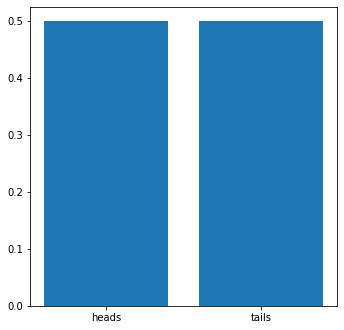

In [2]:
f = plt.figure(figsize=(5.5, 5.5))
plt.bar([1, 2], [0.5, 0.5])
plt.xticks([1, 2], ['heads', 'tails'])

# Distributions
## The Normal Distribution

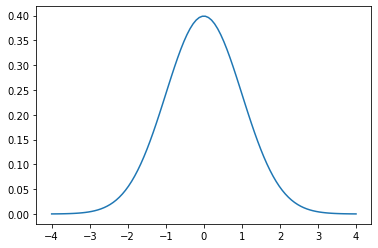

In [3]:
import numpy as np
from scipy.stats import norm

x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x))

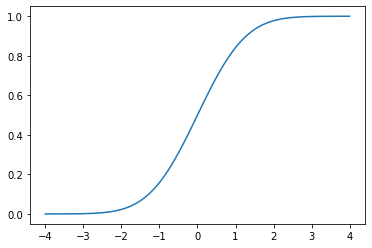

In [4]:
plt.plot(x, norm.cdf(x))

(array([3.000e+00, 1.000e+00, 6.000e+00, 1.300e+01, 2.800e+01, 4.700e+01,
        8.100e+01, 1.710e+02, 2.330e+02, 3.970e+02, 5.040e+02, 7.040e+02,
        8.330e+02, 9.540e+02, 1.044e+03, 1.027e+03, 9.880e+02, 8.290e+02,
        6.500e+02, 5.260e+02, 3.670e+02, 2.590e+02, 1.580e+02, 8.100e+01,
        4.900e+01, 2.400e+01, 1.500e+01, 5.000e+00, 1.000e+00, 2.000e+00]),
 array([-3.92240025e+00, -3.66077899e+00, -3.39915772e+00, -3.13753646e+00,
        -2.87591519e+00, -2.61429393e+00, -2.35267266e+00, -2.09105139e+00,
        -1.82943013e+00, -1.56780886e+00, -1.30618760e+00, -1.04456633e+00,
        -7.82945068e-01, -5.21323803e-01, -2.59702538e-01,  1.91872741e-03,
         2.63539993e-01,  5.25161258e-01,  7.86782523e-01,  1.04840379e+00,
         1.31002505e+00,  1.57164632e+00,  1.83326758e+00,  2.09488885e+00,
         2.35651011e+00,  2.61813138e+00,  2.87975265e+00,  3.14137391e+00,
         3.40299518e+00,  3.66461644e+00,  3.92623771e+00]),
 <BarContainer object of 30 artists

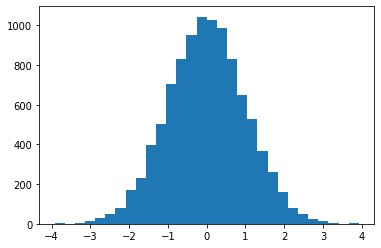

In [5]:
data = norm.rvs(size=10000, random_state=42)
plt.hist(data, bins=30)

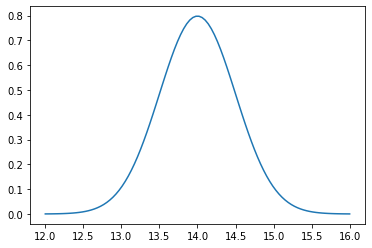

In [6]:
x = np.linspace(12, 16, 100)
plt.plot(x, norm.pdf(x, loc=14, scale=0.5))

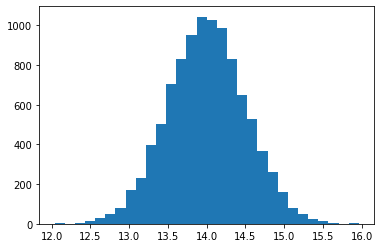

In [7]:
solar_data = norm.rvs(size=10000, loc=14, scale=0.5, random_state=42)
_ = plt.hist(solar_data, bins=30)

In [8]:
solar_data.mean()

13.998932008315789

In [9]:
solar_data.std()

0.5017061030649937

In [10]:
import pandas as pd
df = pd.DataFrame(data={'efficiency': solar_data})

In [11]:
df['efficiency'].skew()

0.001963992377476728

In [12]:
df.kurtosis()

efficiency    0.027093
dtype: float64

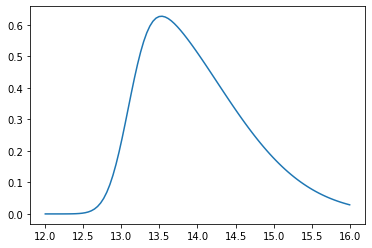

In [13]:
import scipy
plt.plot(x, scipy.stats.skewnorm.pdf(x, scale=1.15, loc=13.1, a=5))

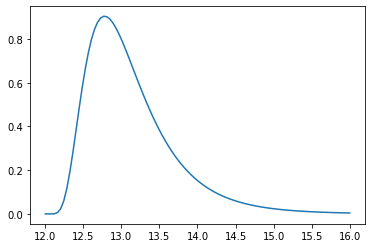

In [14]:
plt.plot(x, scipy.stats.lognorm.pdf(x, loc=12, s=0.5))

### Fitting distributions to get parameters

In [15]:
df = pd.read_csv('data/solar_cell_efficiencies.csv')
df.describe()

,efficiency
count,187196.000000
mean,14.181805
std,0.488751
min,9.691218
25%,13.932445
50%,14.205567
75%,14.482341
max,17.578530


array([[<AxesSubplot:title={'center':'efficiency'}>]], dtype=object)

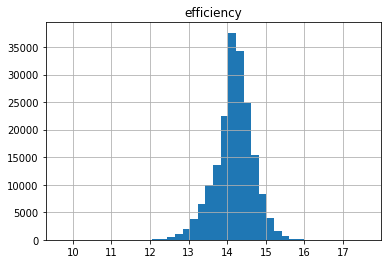

In [16]:
df.hist(bins=40)

In [17]:
df['efficiency'].skew()

-0.3859213025332234

In [18]:
df['efficiency'].kurt()

1.11789277391934

In [19]:
scipy.stats.norm.fit(df['efficiency'])

(14.181805365742568, 0.4887500401256815)

### Bernoulli Distribution

In [20]:
scipy.stats.bernoulli(p=0.7).rvs()

1

In [21]:
norm(loc=10).rvs()

11.82286398028308

### Binomial Distribution

<BarContainer object of 11 artists>

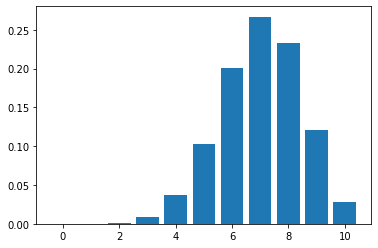

In [22]:
binom_dist = scipy.stats.binom(p=0.7, n=10)
plt.bar(range(11), binom_dist.pmf(k=range(11)))

In [23]:
binom_dist.pmf(k=range(10))

array([5.90490000e-06, 1.37781000e-04, 1.44670050e-03, 9.00169200e-03,
       3.67569090e-02, 1.02919345e-01, 2.00120949e-01, 2.66827932e-01,
       2.33474440e-01, 1.21060821e-01])

### Exponential and Poisson Distributions

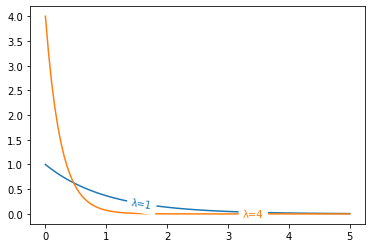

In [24]:
from labellines import labelLines

x = np.linspace(0, 5, 100)
plt.plot(x, scipy.stats.expon.pdf(x, scale=1), label='λ=1')
plt.plot(x, scipy.stats.expon.pdf(x, scale=0.25), label='λ=4')
labelLines(plt.gca().get_lines())

<BarContainer object of 40 artists>

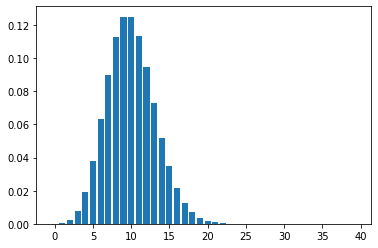

In [25]:
plt.bar(range(40), scipy.stats.poisson.pmf(range(40), mu=10))

### Weibull distribution

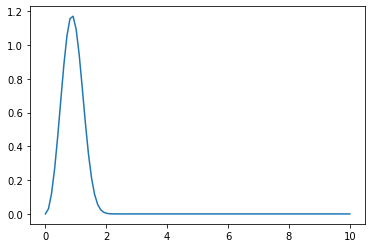

In [26]:
x = np.linspace(0, 10, 100)
plt.plot(x, scipy.stats.weibull_min(c=3).pdf(x))

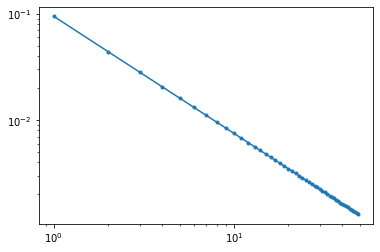

In [27]:
x = range(1, 50)
plt.plot(x, scipy.stats.zipf(a=1.1).pmf(x), marker='.')
plt.xscale('log')
plt.yscale('log')

# Sampling
## Central Limit Theorem

In [28]:
binom = scipy.stats.binom(p=0.5, n=100)

In [29]:
binom.rvs()

43

In [30]:
heads = binom.rvs(10000)

In [31]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

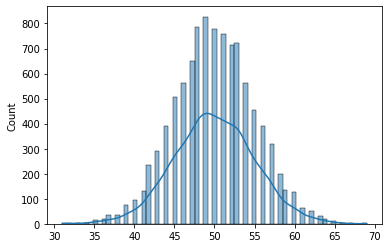

In [32]:
sns.histplot(heads, kde=True)

## Random sampling

In [33]:
df = pd.read_csv('data/solar_cell_efficiencies.csv')
df.sample(100, random_state=42)

,efficiency
87591,13.405397
158602,14.404034
107515,14.458128
116535,14.260624
184959,14.336878
...,...
158398,14.292562
32960,14.725099
29208,14.186570
175322,14.054062


In [34]:
df['efficiency'].mean()

14.181805365742568

In [35]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [36]:
bs.bootstrap(df['efficiency'].values, stat_func=bs_stats.mean)

14.181805365742568    (14.179624979455976, 14.18399163120339)

In [37]:
bs.bootstrap(df['efficiency'].values, stat_func=bs_stats.std)

0.4887500401256815    (0.48680973002139544, 0.4906614390138256)

<AxesSubplot:ylabel='Count'>

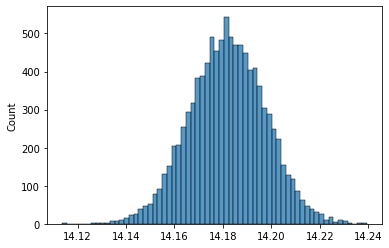

In [38]:
means = []
for i in range(10000):
    sample = np.random.choice(df['efficiency'], 1000, replace=True)
    means.append(sample.mean())

sns.histplot(means)